In [2]:
from modelo import tirador
import numpy as np
from sklearn.neural_network import MLPClassifier

In [3]:
tirador = tirador.Tirador()
clasificacion = []
CANT_DATOS = 75000
# Creamos CANT_DATOS muestras mitad aprobadas y mitad desaprobadas
for _ in range(CANT_DATOS // 2):
    tirador.tirar(max_ancho=6, max_alto=6)
    clasificacion.append(1) # Lo clasificamos como 1 "Aprobado"
    tirador.tirar_mal(max_ancho=24, max_alto=28)
    clasificacion.append(0) # Lo clasificamos como 0 "Desaprobado"

In [4]:
# Metemos los datos en numpy arrays y los acomodamos
matriz_datos = np.array(tirador.get_datos(), dtype=float)
matriz_clasificacion = np.array(clasificacion, dtype=float)
# Aplanamos los datos
matriz_datos= matriz_datos.reshape(CANT_DATOS, 28 * 24)
tirador.descartar_blancos()

In [ ]:
# Creamos el perceptron y lo entrenamos
clf = MLPClassifier(solver='adam', activation="tanh",max_iter=400, random_state=1,
                    hidden_layer_sizes=(672//6,672//9,672//12), verbose=True)
clf = clf.fit(matriz_datos, matriz_clasificacion)

Iteration 1, loss = 0.69413037
Iteration 2, loss = 0.58127745
Iteration 3, loss = 0.45796176
Iteration 4, loss = 0.40683602
Iteration 5, loss = 0.37463685
Iteration 6, loss = 0.34556992
Iteration 7, loss = 0.31781895
Iteration 8, loss = 0.28953784
Iteration 9, loss = 0.25905201
Iteration 10, loss = 0.22674647
Iteration 11, loss = 0.19664179
Iteration 12, loss = 0.17393753
Iteration 13, loss = 0.15178430
Iteration 14, loss = 0.13282887
Iteration 15, loss = 0.11585352
Iteration 16, loss = 0.10151773
Iteration 17, loss = 0.08817755
Iteration 18, loss = 0.07487566
Iteration 19, loss = 0.06291811
Iteration 20, loss = 0.05304399
Iteration 21, loss = 0.04513852
Iteration 22, loss = 0.03745901
Iteration 23, loss = 0.03009761
Iteration 24, loss = 0.02526854
Iteration 25, loss = 0.02224599
Iteration 26, loss = 0.02034327


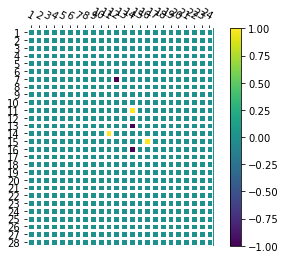

In [10]:
# Vamos a probar con el blanco real del cadete
from blancos_reales import *
from plot_disparos import heatmap, FILAS, COLUMNAS
heatmap(blanco1, FILAS, COLUMNAS)
blanco1 = np.array(blanco1, dtype=float)
blanco1 = blanco1.reshape(1, 28 * 24)


In [13]:
clf.predict(blanco1)


array([1.])